ADABOOST


BIBLIOTECAS

Acurácia: 0.86
Relatório de Classificação:
             precision    recall  f1-score   support

        0.0       0.87      0.98      0.92     18118
        1.0       0.00      0.00      0.00       556
        2.0       0.57      0.25      0.35      1448
        3.0       0.00      0.00      0.00       162
        4.0       0.89      0.44      0.59      1608

avg / total       0.82      0.86      0.83     21892

Treino: 87554
Teste:  21892
Total: 109446


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


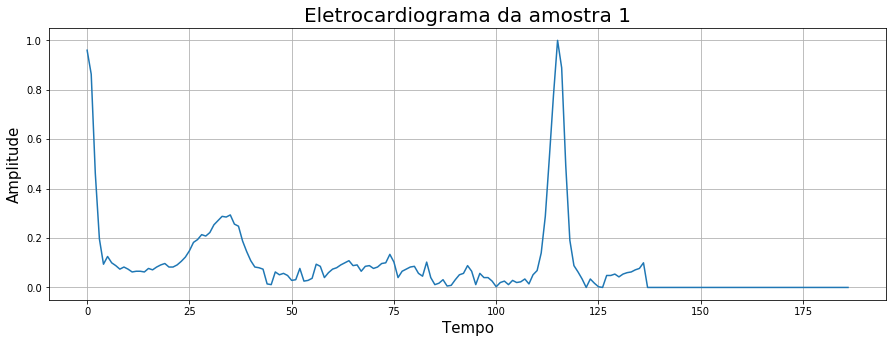

Classes únicas nos rótulos de treinamento: [0. 1. 2. 3. 4.]


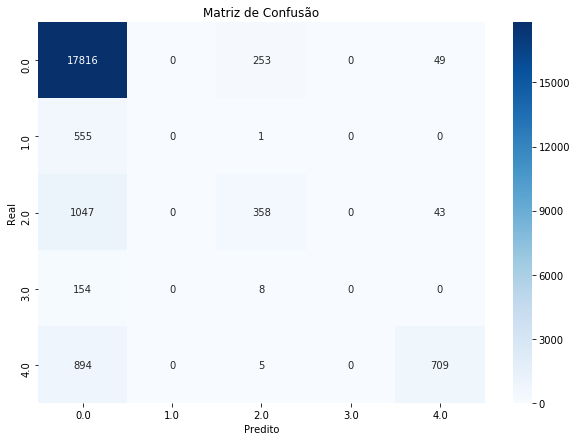

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 546.5min finished


Melhores Parâmetros Encontrados:
{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 150}


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Acurácia: 0.89
Relatório de Classificação:
             precision    recall  f1-score   support

        0.0       0.90      0.98      0.94     18118
        1.0       0.00      0.00      0.00       556
        2.0       0.65      0.40      0.50      1448
        3.0       0.00      0.00      0.00       162
        4.0       0.94      0.68      0.79      1608

avg / total       0.85      0.89      0.87     21892

Treino: 87554
Teste:  21892
Total: 109446


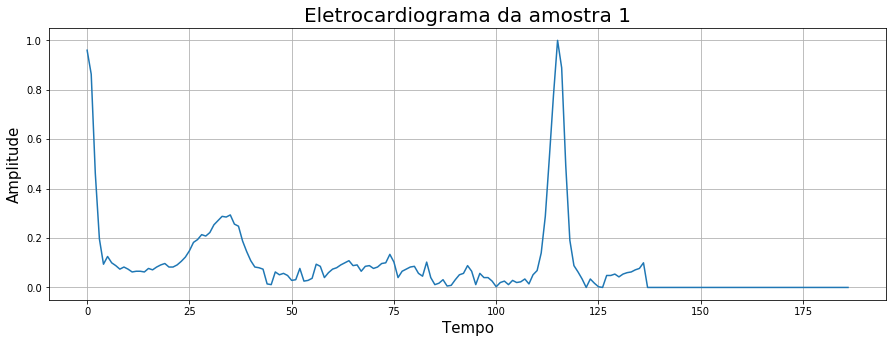

Classes únicas nos rótulos de treinamento: [0. 1. 2. 3. 4.]


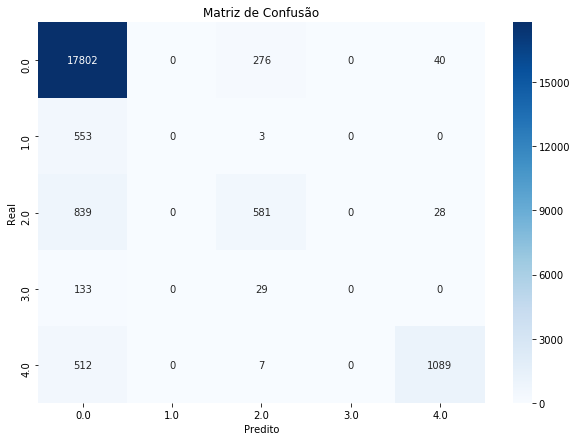

Especificidade: 1.00


In [8]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Carregar os datasets
mitbih_train = pd.read_csv('mitbih_train.csv', header=None)
mitbih_test = pd.read_csv('mitbih_test.csv', header=None)

# Separar features (X) e rótulos (y)
X_train = mitbih_train.iloc[:, :-1].values
y_train = mitbih_train.iloc[:, -1].values
X_test = mitbih_test.iloc[:, :-1].values
y_test = mitbih_test.iloc[:, -1].values

# Inicializar o classificador base (árvore de decisão)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Inicializar o classificador AdaBoost com o algoritmo SAMME para evitar o aviso
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, algorithm='SAMME', random_state=42)

# Treinar o modelo
adaboost.fit(X_train, y_train)

# Fazer previsões
y_pred = adaboost.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:")
print(report)

# Visualizar a amostra de ECG
index = 1  # Escolha o índice da amostra que deseja visualizar
ecg_sample = X_train[index]

print('Treino:', len(X_train))
print("Teste: ", len(X_test))
print('Total:', len(X_train) + len(X_test))

plt.figure(figsize=(15, 5))
plt.plot(ecg_sample)
plt.title(f'Eletrocardiograma da amostra {index}', fontsize=20)
plt.xlabel('Tempo', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.grid(True)
plt.show()

# Visualizar as classes únicas nos rótulos de treinamento
print("Classes únicas nos rótulos de treinamento:", np.unique(y_train))

# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Definir o espaço de busca para os hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=AdaBoostClassifier(base_estimator=base_estimator),
                           param_grid=param_grid,
                           cv=5,  # Número de folds para validação cruzada
                           scoring='accuracy',
                           n_jobs=-1,  # Usar todos os núcleos disponíveis
                           verbose=1)

# Executar o GridSearchCV
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros e o melhor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Melhores Parâmetros Encontrados:")
print(best_params)

# Fazer previsões com o melhor modelo
y_pred = best_model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:")
print(report)

# Visualizar a amostra de ECG
index = 1  # Escolha o índice da amostra que deseja visualizar
ecg_sample = X_train[index]

print('Treino:', len(X_train))
print("Teste: ", len(X_test))
print('Total:', len(X_train) + len(X_test))

plt.figure(figsize=(15, 5))
plt.plot(ecg_sample)
plt.title(f'Eletrocardiograma da amostra {index}', fontsize=20)
plt.xlabel('Tempo', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.grid(True)
plt.show()

# Visualizar as classes únicas nos rótulos de treinamento
print("Classes únicas nos rótulos de treinamento:", np.unique(y_train))

# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

#Calculo de especificidade

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular a especificidade
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

print(f"Especificidade: {specificity:.2f}")



In [16]:
# Calcular a especificidade
specifities = []
for i in range (len(conf_matrix)):
    TN = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + conf_matrix[i, i]
    FP = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specifities.append(specificity)
#Calculando a especificidade média para o melhor modelo
specifity_mean = np.mean(specifities)
print(f"Especificidade média: {specifity_mean:.4f}")


Especificidade média: 0.8883
